## Ridge and Lasso Regression Implementation

### Use of Cross-Validation.

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

### Linear Regression:

In [13]:
from sklearn.datasets import load_boston

In [14]:
load_boston

<function sklearn.datasets._base.load_boston(*, return_X_y=False)>

In [15]:
dir(load_boston)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__wrapped__']

In [16]:
df=load_boston()

In [17]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [18]:
dir(df)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [19]:
data=pd.DataFrame(df.data)

<IPython.core.display.Javascript object>

In [21]:
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
data.columns=df.feature_names

In [23]:
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
data["Output"]=df.target

In [25]:
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Output
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
X= data.iloc[:,:-1]  
Y= data.iloc[:,-1]

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()  ## Here as X dataset contains multiple features therefore, we are performing multiple linear regression and not simple linear regression

In [31]:
cvs=cross_val_score(lr,X,Y,cv=5,scoring='neg_mean_squared_error')  ##neg_mean_squared_error, this values should be close to zero, the more it is close to zero , the more the model performs better.

In [33]:
cvs

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [34]:
mean_cvs=np.mean(cvs)

<IPython.core.display.Javascript object>

In [35]:
print(mean_cvs)

-37.13180746769922


Now, as the avg cross validation score is no where near to zero ,the model is not performing better this is what we can say.

In order to improve cross_validation_score, we will try some different type of regression techniques i.e: Ridge and Lasso

## Ridge Regression:

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

##### GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters. 

It also have an inbuilt function to provide cross validation score

In [40]:
ridge=Ridge()

param={'alpha':[1e-15,1e-10,1e-8,1e-2,1,5,10,20,30,45,55,60,70,90,75,88,95,100,120]}


In [41]:
type(param)

dict

In [42]:
ridge_regressor = GridSearchCV(ridge,X,Y,scoring='neg_mean_squared_error',cv=5)


ValueError: Parameter grid for parameter (CRIM) needs to be a list or numpy array, but got (<class 'pandas.core.series.Series'>). Single values need to be wrapped in a list with one element.

In [44]:
## Forgot to pass param !
ridge_regressor = GridSearchCV(ridge,param,X,Y,scoring='neg_mean_squared_error',cv=5)


C:\Users\Jayesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass scoring=        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0

In [45]:
ridge_regressor.fit(X,Y)

ValueError: scoring should either be a single string or callable for single metric evaluation or a list/tuple of strings or a dict of scorer name mapped to the callable for multiple metric evaluation. Got         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns] of type <class 'pandas.core.frame.DataFrame'>

In [46]:
## We can't pass X and Y in gridsearchcv !!

In [47]:
ridge_regressor = GridSearchCV(ridge,param,scoring='neg_mean_squared_error',cv=5)


In [48]:
ridge_regressor.fit(X,Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 5, 10, 20, 30,
                                   45, 55, 60, 70, 90, 75, 88, 95, 100, 120]},
             scoring='neg_mean_squared_error')

In [49]:
dir(ridge_regressor)  ## best_params_', 'best_score_',

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_

In [50]:
ridge_regressor.best_params_

{'alpha': 120}

In [52]:
ridge_regressor.best_score_

-29.800300806876066

In [53]:
ridge_regressor.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 5, 10, 20, 30,
                                   45, 55, 60, 70, 90, 75, 88, 95, 100, 120]},
             scoring='neg_mean_squared_error')>

In [55]:
help(ridge_regressor.best_score_)

Help on float64 object:

class float64(floating, builtins.float)
 |  float64(x=0, /)
 |  
 |  Double-precision floating-point number type, compatible with Python `float`
 |  and C ``double``.
 |  Character code: ``'d'``.
 |  Canonical name: ``np.double``.
 |  Alias: ``np.float_``.
 |  Alias *on this platform*: ``np.float64``: 64-bit precision floating-point number type: sign bit, 11 bits exponent, 52 bits mantissa.
 |  
 |  Method resolution order:
 |      float64
 |      floating
 |      inexact
 |      number
 |      generic
 |      builtins.float
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __float__(self, /)
 |      float(self)
 |  
 |  __floordiv__(self, value, /)
 |      Return self//v

In [56]:
ridge_regressor.best_score_

-29.800300806876066

In [57]:
## Now as we can see, the score is improved a little bit and is still better than linear regression.
##Thus we can use ridge regressor over linear for this dataset

In [58]:
## Now let's try for Lasso Regression :


## Lasso Regression:

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [61]:
param={'alpha':[1e-15,1e-10,1e-8,1e-2,1,5,10,20,30,45,55,60,70,90,75,88,95,100,120]}

In [62]:
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,Y)



C:\Users\Jayesh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4430.746729651311, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jayesh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4397.459304778431, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jayesh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3796.653037433508, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jayesh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 5, 10, 20, 30,
                                   45, 55, 60, 70, 90, 75, 88, 95, 100, 120]},
             scoring='neg_mean_squared_error')

In [66]:
lasso_regressor.best_params_

{'alpha': 1}

In [68]:
lasso_regressor.best_score_

-35.531580220694856

 It is far better than linear regression.
 
Though it's score is less than ridge but it usually performs better than ridge if the dataset has many features and it gives more "generalized model"

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X ,Y , test_size=0.3 , random_state = 0)

In [70]:
lasso_regressor.predict(X_test)  ## It's simply predicting the X_test values.

array([23.74549008, 25.05669894, 27.30699681, 15.26474466, 20.28388223,
       22.75172373, 21.45598059, 24.23856649, 21.11819135, 19.95909495,
        8.98313974, 13.30218316, 17.99925624,  8.39272295, 35.35448484,
       30.78862119, 22.38396018, 34.3159854 , 29.8521009 , 24.63915134,
       25.7851669 , 25.20997813, 20.07312698, 29.34704456, 23.54801802,
       17.49320154, 19.76581421, 22.02254005, 31.35043449, 19.53061141,
       17.86731915, 20.03959005, 22.70589322, 24.27507125, 28.3321545 ,
       20.26286175, 10.68729818, 24.94704305, 15.84336797, 12.8254677 ,
       25.41186454, 20.63647768, 22.05355817, 16.77749717, 23.30629191,
       25.77681736, 19.84379805, 23.32853181, 12.22570134, 23.7054699 ,
       21.09270778, 16.76593695, 24.7895207 , 27.77843148, 15.02615536,
       21.29343807, 21.55732101, 17.59916216, 18.35971801, 19.53427781,
       21.69584327, 22.09466825, 30.77701755, 30.58126341, 18.59617266,
       31.00696923, 18.55257582, 18.71479862, 15.79040727, 22.86

In [71]:
predict_lasso=lasso_regressor.predict(X_test)

In [72]:
predict_ridge=ridge_regressor.predict(X_test)

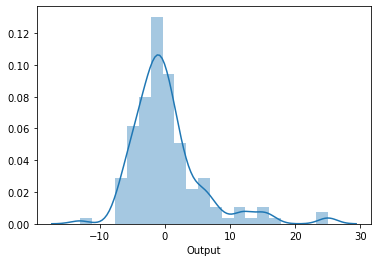

In [77]:
import seaborn as sns

sns.distplot(Y_test-predict_lasso)  ## Here we are subtracting Y_test values with our estimated/predicted values.

In [ ]:
## It is more stable and generalized than ridge

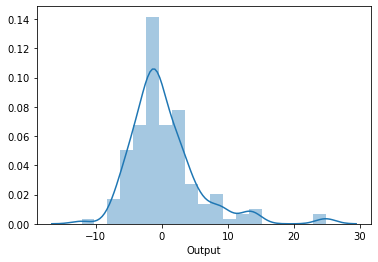

In [78]:
sns.distplot(Y_test-predict_ridge)